# <font color ='green'> Online Retail Data Analysis:<br> Uncovering Insights and Driving Business Growth </font>

## Introduction

In the dynamic realm of modern business, data analysis plays a pivotal role in extracting actionable insights and driving informed decision-making. As an accomplished data analyst, I undertook a comprehensive Online Retail Data Analysis project aimed at unearthing valuable insights to foster business growth.

This project encompassed a thorough examination of an extensive online retail dataset, encompassing crucial information pertaining to customer transactions, product details, and revenue metrics. Employing advanced data cleaning techniques, exploratory data analysis, and cutting-edge visualization tools, my objective was to extract profound insights and deliver strategic recommendations.

Within this document, I present a comprehensive overview of the findings and outcomes derived from my meticulous analysis. Delving into the intricate nuances of the online retail data, I will highlight key insights, emerging trends, and actionable recommendations that have the potential to propel businesses to new heights. This analysis showcases not only my prowess in data manipulation and visualization but also my ability to derive tangible business value from complex datasets.

Join me on this captivating journey as we unravel the intricate tapestry of online retail data and unlock the hidden opportunities that lie within.

## Description

This notebook performs an analysis of an online retail dataset. The dataset contains information about customer transactions, including the invoice details, product descriptions, quantities, prices, and customer information.

The analysis aims to answer several questions to gain insights into the retail business, including:

1. Time series analysis of revenue data for the year 2011.
2. Identification of top revenue-generating countries, excluding the United Kingdom.
3. Analysis of the top revenue-generating customers.
4. Examination of demand for products by country, highlighting regions with high demand.
5. Determination of the top-selling products based on quantity sold and revenue generated.

The notebook utilizes various data cleaning techniques, visualization libraries, and analytical methods to extract meaningful insights from the dataset.

Let's dive into the analysis and explore the online retail data!


## Data Wrangling

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# importing dataset
df = pd.read_excel('Online Retail.xlsx')

In [3]:
print('First five rows of the dataset:')
df.head(5)

First five rows of the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [85]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

let's drop all rows that do not have Description data:

In [5]:
# simply drop whole row with null value in Description column
df.dropna(subset=["Description"], axis=0, inplace=True)

# reset index, because we droped 1454 rows
df.reset_index(drop=True, inplace=True)

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [7]:
# rename Description column to Product
df.rename(columns = {'Description' : 'Product'}, inplace = True)
df.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
# Remove rows with quantity below 1
df = df[df['Quantity'] >= 1]

# Remove rows with unit price below 0
df = df[df['UnitPrice'] >= 0]
df.shape

(530691, 8)

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Product             0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132767
Country             0
dtype: int64

## Exploratory Data Analysis

#### <div class='alert alert-danger'> Q1.The CEO of the retail store is interested to view the time series of the revenue data for the year 2011 only. He would like to view granular data by looking into revenue for each month. The CEO is interested in viewing the seasonal trends and wants to dig deeper into why these trends occur. This analysis will be helpful for the CEO to forecast for the next year.</div>

In [10]:
# Calculate revenue
df.insert(df.columns.get_loc('UnitPrice') + 1, 'Revenue', df['Quantity'] * df['UnitPrice'])
df.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,Revenue,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom


In [11]:
# Extract year and month from the InvoiceDate column
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Filter data for the year 2011
df_2011 = df[df['InvoiceDate'].dt.year == 2011]

# Calculate monthly revenue
monthly_revenue = df_2011.groupby('YearMonth')['Revenue'].sum()
monthly_revenue

YearMonth
2011-01     691364.560
2011-02     523631.890
2011-03     717639.360
2011-04     537808.621
2011-05     770536.020
2011-06     761739.900
2011-07     719221.191
2011-08     759138.380
2011-09    1058590.172
2011-10    1154979.300
2011-11    1509496.330
2011-12     638792.680
Freq: M, Name: Revenue, dtype: float64

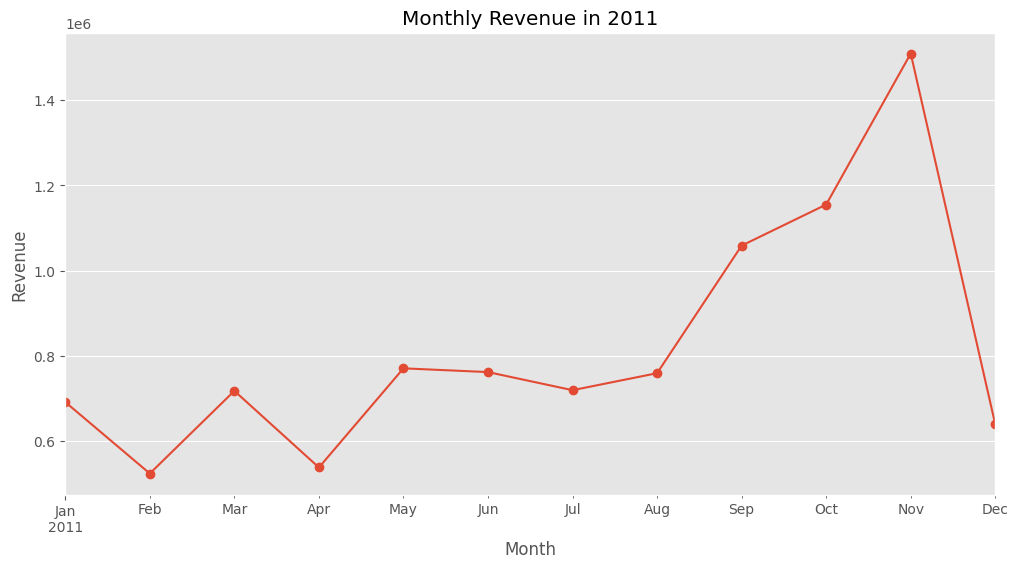

In [15]:
mpl.style.use('ggplot')

# Plot the time series of revenue
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind = 'line',marker='o')

plt.title('Monthly Revenue in 2011')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)

plt.show()


 **<div class ='alert alert-danger'>Q2.The CMO is interested in viewing the top 10 countries which are generating the highest revenue. Additionally, the CMO is also interested in viewing the quantity sold along with the revenue generated. The CMO does not want to have the United Kingdom in this visual.</div>**

In [16]:
# Filter out United Kingdom
df_filtered = df[df['Country'] != 'United Kingdom']

# Calculate revenue and quantity sold by country
country_stats = df_filtered.groupby('Country').agg({'Revenue': 'sum', 'Quantity': 'sum'})

# Sort by revenue in descending order
top_countries = country_stats.sort_values(by='Revenue', ascending=False).head(10)
top_countries

,Revenue,Quantity
Country,,
Netherlands,285446.34,200937
EIRE,283453.96,147447
Germany,228867.14,119263
France,209715.11,112104
Australia,138521.31,84209
Spain,61577.11,27951
Switzerland,57089.90,30630
Belgium,41196.34,23237
Sweden,38378.33,36083


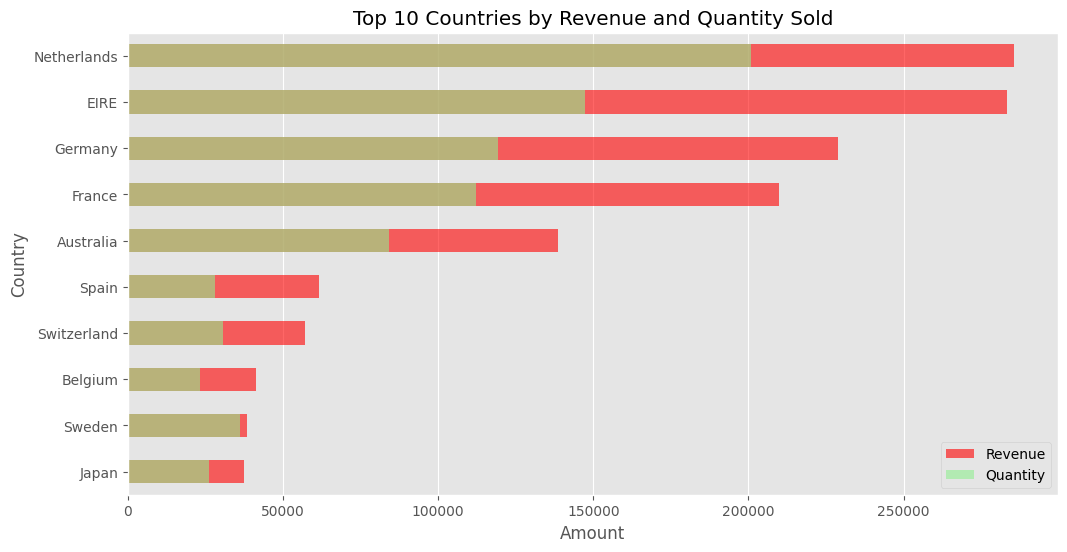

In [17]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
top_countries['Revenue'].plot(kind='barh', color='red', alpha=0.6, label='Revenue')
top_countries['Quantity'].plot(kind='barh', color='lightgreen', alpha=0.6, label='Quantity')

plt.title('Top 10 Countries by Revenue and Quantity Sold')
plt.ylabel('Country')
plt.xlabel('Amount')

plt.legend()
plt.gca().invert_yaxis()  # Invert the y-axis to display the products in descending order
plt.grid(axis='y')
plt.show()

 **<div class ='alert alert-danger'>Q3 The CMO of the online retail store wants to view the information on the top 10 customers by revenue. He is interested in a visual that shows the greatest revenue generating customer at the start and gradually declines to the lower revenue generating customers. The CMO wants to target the higher revenue generating customers and ensure that they remain satisfied with their products.</div>**

In [18]:
# Filter out missing values in CustomerID
df_filtered = df.dropna(subset=['CustomerID'])

# Calculate revenue by customer
customer_revenue = df_filtered.groupby('CustomerID')['Revenue'].sum()

# Sort by revenue in descending order and select top 10 customers
top_customers = customer_revenue.sort_values(ascending=False).head(10)

# Sort customers in ascending order to have highest revenue at the top
top_customers = top_customers.sort_values()
top_customers

CustomerID
12346.0     77183.60
16029.0     81024.84
17511.0     91062.38
14156.0    117379.63
12415.0    124914.53
14911.0    143825.06
16446.0    168472.50
17450.0    194550.79
18102.0    259657.30
14646.0    280206.02
Name: Revenue, dtype: float64

In [50]:
top_customers.index

Float64Index([12346.0, 16029.0, 17511.0, 14156.0, 12415.0, 14911.0, 16446.0,
              17450.0, 18102.0, 14646.0],
             dtype='float64', name='CustomerID')

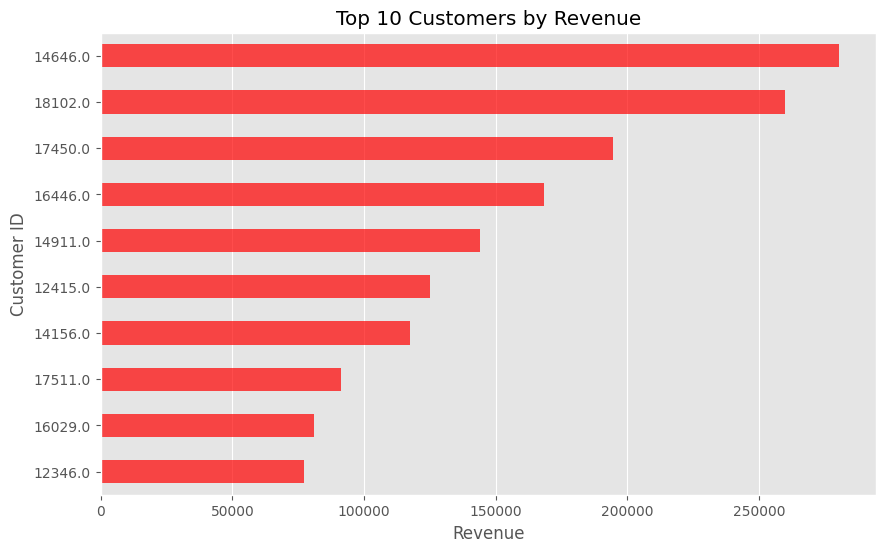

In [19]:
# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
top_customers.plot(kind='barh', color='red', alpha=0.7)

plt.title('Top 10 Customers by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Customer ID')
plt.grid(axis='y')

plt.show()

**<div class='alert alert-danger'>Q4. The CEO is looking to gain insights on the demand for their products. He wants to look at all countries and see which regions have the greatest demand for their products. Once the CEO gets an idea of the regions that have high demand, he will initiate an expansion strategy which will allow the company to target these areas and generate more business from these regions. He wants to view the entire data on a single view without the need to scroll or hover over the data points to identify the demand. There is no need to show data for the United Kingdom as the CEO is more interested in viewing the countries that have expansion opportunities.</div>**

In [20]:
import plotly.express as px

In [21]:
# Filter out data for countries other than the United Kingdom
df_filtered = df[df['Country'] != 'United Kingdom']

# Calculate total quantity sold by country
country_demand = df_filtered.groupby('Country')['Quantity'].sum().reset_index()
country_demand

,Country,Quantity
0,Australia,84209
1,Austria,4881
2,Bahrain,314
3,Belgium,23237
4,Brazil,356
5,Canada,2763
6,Channel Islands,9491
7,Cyprus,6361
8,Czech Republic,671
9,Denmark,8235


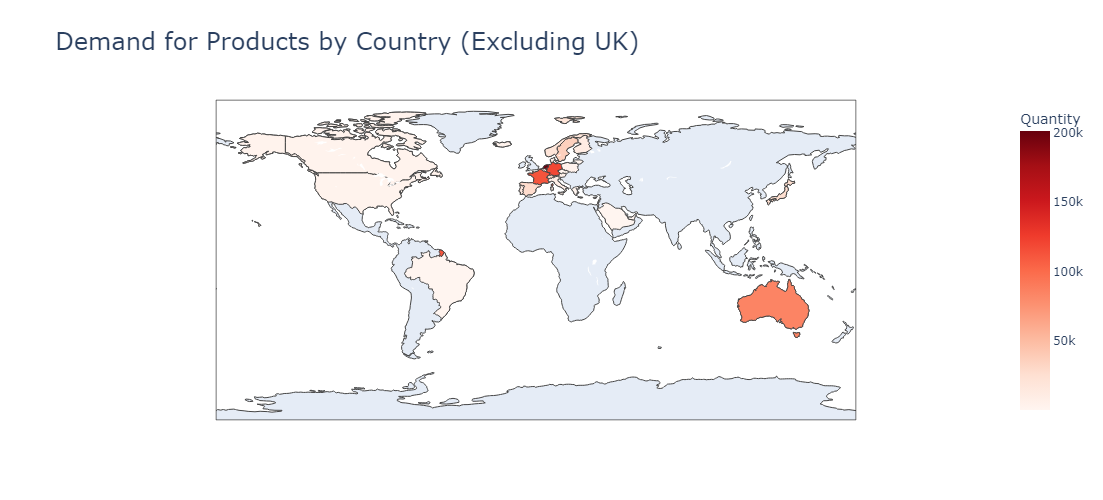

In [30]:
# Create a choropleth map
fig = px.choropleth(country_demand, 
                    locations='Country', 
                    locationmode='country names', 
                    color='Quantity', 
                    title='Demand for Products by Country (Excluding UK)',
                    color_continuous_scale='Reds')
# Customizations
fig.update_layout(title='Demand for Products by Country (Excluding UK)',  # Set a custom title
                  title_font_size=24,  # Increase the title font size
                  geo=dict(bgcolor='white'),  # Set the background color to white
                  coloraxis_colorbar=dict(title='Quantity'),  # Set a custom colorbar title
                  coloraxis_showscale=True)  # Show the color scale

# Set the size of the figure
fig.update_layout(height=500, width=900)

# Display the choropleth map
fig.show()

**<div class='alert alert-danger'>Q5. What are the top-selling products or services based on the quantity sold and revenue generated?</div>**

In [31]:
# Calculate total quantity sold and revenue generated for each product
product_sales = df.groupby('Product').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()
product_sales

,Product,Quantity,Revenue
0,4 PURPLE FLOCK DINNER CANDLES,144,290.80
1,50'S CHRISTMAS GIFT BAG LARGE,1915,2343.63
2,DOLLY GIRL BEAKER,2455,2891.25
3,I LOVE LONDON MINI BACKPACK,389,1628.17
4,I LOVE LONDON MINI RUCKSACK,1,4.15
...,...,...,...
4072,wrongly coded 20713,800,0.00
4073,wrongly coded 23343,1000,0.00
4074,wrongly marked,48,0.00
4075,wrongly marked 23343,200,0.00


In [43]:
# Sort the products based on quantity sold in descending order
top_products_by_quantity = product_sales.sort_values('Quantity', ascending=False).head(10)
top_products_by_quantity

,Product,Quantity,Revenue
2401,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
2065,MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
3950,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047,13841.85
1827,JUMBO BAG RED RETROSPOT,48478,94340.05
3860,WHITE HANGING HEART T-LIGHT HOLDER,37895,106292.77
2695,POPCORN HOLDER,36761,34298.87
229,ASSORTED COLOUR BIRD ORNAMENT,36461,59094.93
2351,PACK OF 72 RETROSPOT CAKE CASES,36419,21259.10
2755,RABBIT NIGHT LIGHT,30788,66964.99
2120,MINI PAINT SET VINTAGE,26633,16937.82


In [53]:
top_products_by_quantity.Product

2401           PAPER CRAFT , LITTLE BIRDIE
2065        MEDIUM CERAMIC TOP STORAGE JAR
3950     WORLD WAR 2 GLIDERS ASSTD DESIGNS
1827               JUMBO BAG RED RETROSPOT
3860    WHITE HANGING HEART T-LIGHT HOLDER
2695                        POPCORN HOLDER
229          ASSORTED COLOUR BIRD ORNAMENT
2351       PACK OF 72 RETROSPOT CAKE CASES
2755                    RABBIT NIGHT LIGHT
2120               MINI PAINT SET VINTAGE 
Name: Product, dtype: object

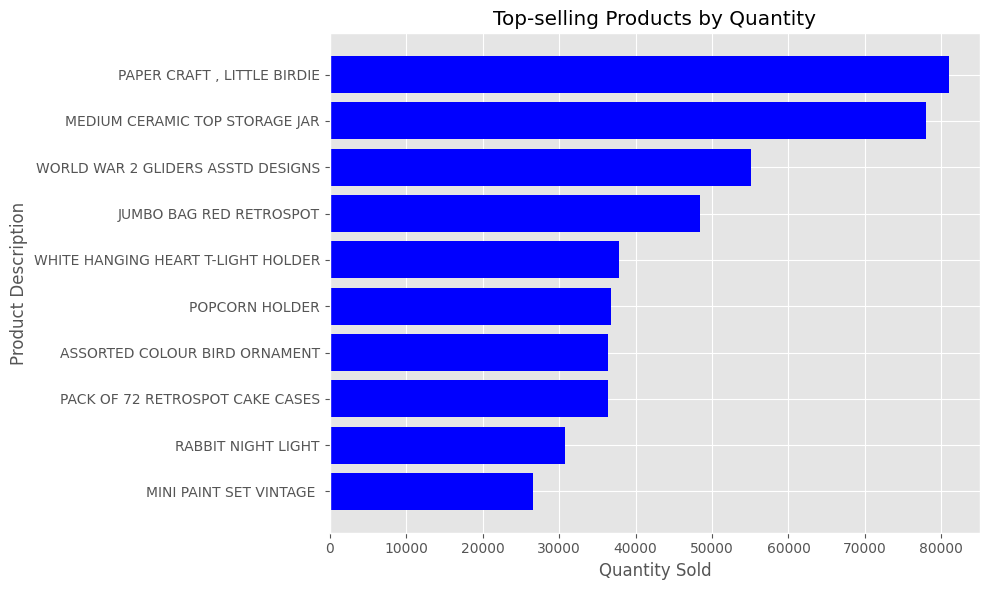

In [45]:
# Visualize the top-selling products by quantity
plt.figure(figsize=(10, 6))
plt.barh(top_products_by_quantity['Product'], top_products_by_quantity['Quantity'], color='blue')

plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top-selling Products by Quantity')

plt.gca().invert_yaxis()  # Invert the y-axis
plt.tight_layout()
plt.show()

In [46]:
# Sort the products based on revenue generated in descending order
top_products_by_revenue = product_sales.sort_values('Revenue', ascending=False).head(10)
top_products_by_revenue

,Product,Quantity,Revenue
1072,DOTCOM POSTAGE,708,206248.77
2867,REGENCY CAKESTAND 3 TIER,13890,174484.74
2401,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
3860,WHITE HANGING HEART T-LIGHT HOLDER,37895,106292.77
2427,PARTY BUNTING,18299,99504.33
1827,JUMBO BAG RED RETROSPOT,48478,94340.05
2065,MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
2205,Manual,7231,78112.82
2706,POSTAGE,3150,78101.88
2755,RABBIT NIGHT LIGHT,30788,66964.99


In [52]:
top_products_by_revenue.Product

1072                        DOTCOM POSTAGE
2867              REGENCY CAKESTAND 3 TIER
2401           PAPER CRAFT , LITTLE BIRDIE
3860    WHITE HANGING HEART T-LIGHT HOLDER
2427                         PARTY BUNTING
1827               JUMBO BAG RED RETROSPOT
2065        MEDIUM CERAMIC TOP STORAGE JAR
2205                                Manual
2706                               POSTAGE
2755                    RABBIT NIGHT LIGHT
Name: Product, dtype: object

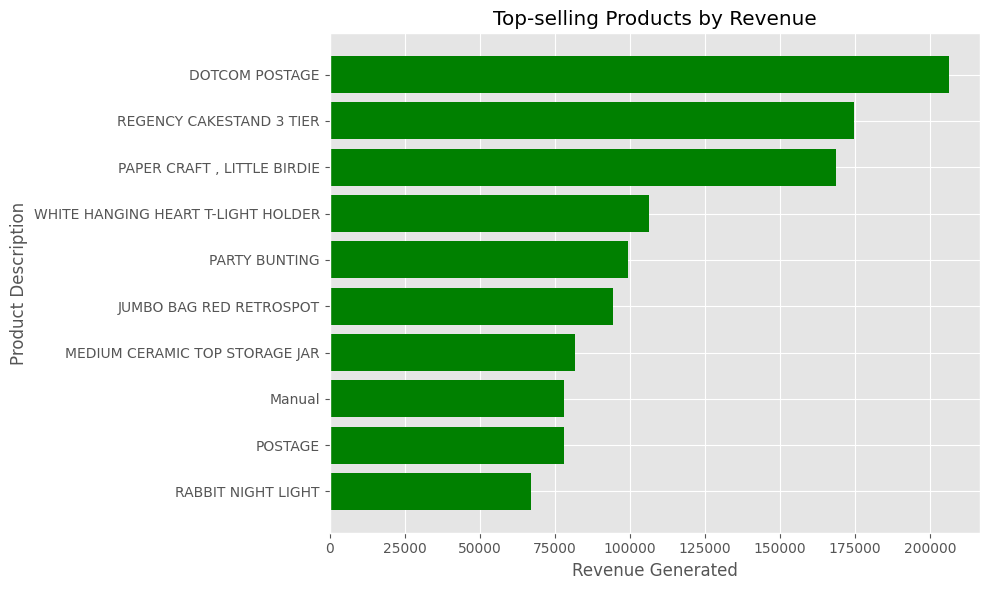

In [47]:
# Visualize the top-selling products by revenue
plt.figure(figsize=(10, 6))
plt.barh(top_products_by_revenue['Product'], top_products_by_revenue['Revenue'], color='green')

plt.xlabel('Revenue Generated')
plt.ylabel('Product Description')
plt.title('Top-selling Products by Revenue')

plt.gca().invert_yaxis()  # Invert the y-axis
plt.tight_layout()
plt.show()

## Findings and Insights

### Q1: Revenue Time Series Analysis for 2011

- The revenue data for 2011 shows distinct seasonal trends, with the highest revenue generated in the fourth quarter, particularly in November.
- This seasonal pattern can be attributed to the holiday season, where customers tend to increase their purchases.
- Understanding these seasonal trends can help the CEO forecast revenue and plan strategies for future years, ensuring adequate inventory and targeted marketing campaigns during peak seasons.

### Q2: Top Revenue Generating Countries (Excluding UK)

- The top 10 countries generating the highest revenue are Netherlands, EIRE, Germany, France, Australia, Spain,
  Switzerland, Belgium, Sweden, Japan.
- The quantity sold and revenue generated are presented side by side, providing insights into the demand and profitability of products in each country.
- By excluding the United Kingdom, the CMO can focus on identifying expansion opportunities in other regions and tailor marketing strategies accordingly.

### Q3: Top Customers by Revenue

- The top 10 customers by revenue are CstomerID [12346.0, 16029.0, 17511.0, 14156.0, 12415.0, 14911.0, 16446.0,
 17450.0, 18102.0, 14646.0].
- The visual representation highlights the gradual decline in revenue from the highest revenue-generating customer to the lower ones.
- This information enables the CMO to prioritize efforts to retain and satisfy high-value customers, ensuring their continued loyalty and engagement.

### Q4: Demand for Products by Country (Excluding UK)

- The map visualization showcases the demand for products in various countries, excluding the United Kingdom.
- The color intensity represents the quantity sold, allowing for a quick understanding of the regions with the highest demand.
- This insight can guide the CEO in identifying potential expansion opportunities and developing targeted strategies to capture market share in those regions.

### Q5: Top-Selling Products by Quantity and Revenue

- The top-selling products based on quantity sold are 

                                                 1           PAPER CRAFT , LITTLE BIRDIE
                                                 2        MEDIUM CERAMIC TOP STORAGE JAR
                                                 3     WORLD WAR 2 GLIDERS ASSTD DESIGNS
                                                 4               JUMBO BAG RED RETROSPOT
                                                 5    WHITE HANGING HEART T-LIGHT HOLDER
                                                 6                        POPCORN HOLDER
                                                 7          ASSORTED COLOUR BIRD ORNAMENT
                                                 8       PACK OF 72 RETROSPOT CAKE CASES
                                                 9                    RABBIT NIGHT LIGHT
                                                 10               MINI PAINT SET VINTAGE
- The top-selling products based on revenue generated are

                                                    1                        DOTCOM POSTAGE
                                                    2              REGENCY CAKESTAND 3 TIER
                                                    3           PAPER CRAFT , LITTLE BIRDIE
                                                    4    WHITE HANGING HEART T-LIGHT HOLDER
                                                    5                         PARTY BUNTING
                                                    6              JUMBO BAG RED RETROSPOT
                                                    7       MEDIUM CERAMIC TOP STORAGE JAR
                                                    8                                Manual
                                                    9                               POSTAGE
                                                    10                   RABBIT NIGHT LIGHT                 
                                                    
- These insights provide valuable information for inventory management, marketing campaigns, and product development.



## Conclusion and Recommendations

In conclusion, the analysis of the online retail data has provided valuable insights into the company's performance and customer behavior. The following key findings have been derived from the analysis:

1. **Seasonal Revenue Trends**: The revenue data for 2011 exhibits clear seasonal patterns, with peak sales occurring during the fourth quarter. This indicates the presence of seasonal demand fluctuations that can be leveraged for effective inventory management and targeted marketing campaigns.

2. **Top Revenue-Generating Countries**: The analysis has identified the top revenue-generating countries, excluding the United Kingdom. These countries offer significant growth opportunities for the company. To capitalize on these opportunities, it is recommended to allocate marketing resources and develop localized strategies tailored to the preferences and needs of customers in each country.

3. **High-Value Customers**: By analyzing customer revenue, the top 10 customers by revenue have been identified. These customers are crucial to the company's success, and it is recommended to prioritize their satisfaction and strengthen customer relationships through personalized offers, loyalty programs, and exceptional customer service.

4. **Demand by Region**: The demand for products across different countries, excluding the United Kingdom, has been visualized. This information can guide the company's expansion strategy, as regions with high demand present potential opportunities for market penetration and growth. It is advisable to conduct market research and develop targeted marketing initiatives to capture the untapped potential in these regions.

5. **Top-Selling Products**: The analysis has revealed the top-selling products based on quantity sold and revenue generated. This information can aid in inventory management, pricing decisions, and product development. The company should ensure sufficient stock availability for these popular products and consider expanding their product offerings based on customer preferences and market trends.

Based on these insights, the following recommendations are proposed:

1. Develop a comprehensive seasonal marketing strategy that aligns with the observed revenue trends. This strategy should include targeted promotions, discounts, and special offers during peak seasons to drive sales and capitalize on customer demand.

2. Invest in market research and localization efforts to tailor marketing campaigns and product offerings to the specific needs and preferences of customers in the top revenue-generating countries. This will help build stronger customer relationships and enhance brand loyalty.

3. Implement a customer relationship management (CRM) system to effectively manage and nurture relationships with high-value customers. This can involve personalized communications, exclusive offers, and proactive customer support to ensure their satisfaction and long-term loyalty.

4. Conduct market analysis and feasibility studies to identify the most promising regions for expansion. Develop targeted marketing and sales strategies to penetrate these markets and establish a strong presence.

5. Continuously monitor and analyze product sales data to identify emerging trends and adapt the product portfolio accordingly. Regularly review inventory levels to ensure optimal stock availability for the top-selling products and consider introducing new products that align with customer preferences and market demand.

By implementing these recommendations, the company can improve its revenue, customer satisfaction, and market position, leading to sustainable growth and long-term success.



##  Author
**<font color='blue'>[Mostafizur Rahman](https://www.linkedin.com/in/mostafizrahman10/) </font>**